# Homework 2: Model Tuning

A recently released dataset explored 21B friendships on Facebook to identify characteristics associated with social and economic mobility. A strong indicator for this was the *economic connectedness* of an individual, the percentage of high income connections they had.

In this dataset, we have average economic connectedness at the county level as well as a large number of characteristics about the county. We want to construct a model to effectively predict the economic connectedness (`ec_county`) given the other characteristics. An effective model here would begin to show us other important factors in social mobility.

Construct a model (including tuning) and interpret your results.

Dataset used:

`county_level_ec_neighborhood.csv`

In [ ]:
import pandas as pd
import numpy as np
import keras 
from keras import layers

In [ ]:
soc = pd.read_csv("county_level_ec_neighborhood.csv")

In [ ]:
soc.dropna(inplace=True)

In [ ]:
soc.shape

(2090, 34)

In [ ]:
soc['ec_county']

0       0.72077
1       0.74313
2       0.41366
3       0.63152
4       0.72562
         ...   
2796    0.83568
2798    0.89207
2802    0.73936
2805    0.79977
2807    0.83430
Name: ec_county, Length: 2090, dtype: float64

In [ ]:
X = soc.drop(['county_x', 'county_name','ec_county'], axis = 1)

y = soc[['ec_county']]

In [ ]:
X.shape

(2090, 31)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=24)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=24)

In [ ]:
clf = RandomForestRegressor(oob_score = True).fit(X_train, y_train)

<ipython-input-13-8657cab46371>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestRegressor(oob_score = True).fit(X_train, y_train)


In [ ]:
clf.oob_score_

0.8057067092986272

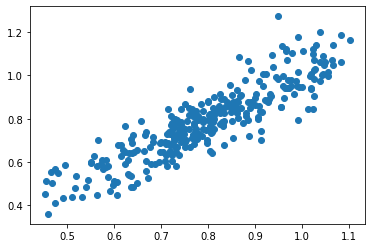

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(clf.predict(X_test), y_test)

In [ ]:
import numpy as np
X_train = np.array(X_train)
X_train

array([[7.9150219e+04, 2.1731945e+01, 3.1230697e-01, ..., 8.3696826e+02,
        1.3480644e-02, 5.2859790e+02],
       [9.7676859e+04, 2.6219418e+01, 3.9626497e-01, ..., 8.2594257e+02,
        2.7757755e-02, 6.0410925e+02],
       [6.2728117e+04, 2.3784027e+01, 1.5488046e-01, ..., 3.6770225e+00,
        8.9014760e-03, 1.9689051e+00],
       ...,
       [9.5677375e+04, 3.4891159e+01, 1.9047344e-01, ..., 3.7100491e+02,
        1.9884517e-02, 2.9397504e+02],
       [9.3622109e+04, 2.9099094e+01, 3.0513936e-01, ..., 1.2738395e+03,
        4.5897460e-03, 6.8834375e+02],
       [6.5680813e+04, 2.3720495e+01, 1.5630737e-01, ..., 2.2377888e+02,
        1.5193356e-02, 1.3801863e+02]])

In [ ]:
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [ ]:
from keras.optimizers.optimizer_v2.optimizer_v2 import learning_rate_schedule
nodes_list = [32,64,128]
batch_sizes = [20,100,500]
lrs = [.01,.001,.0001]
dropouts = [.1,.2,.4]
activations = ['sigmoid','relu']

for dropout in dropouts:
  for batch_size in batch_sizes:
    for lr in lrs:
      for nodes in nodes_list:
        for activation in activations:
          model = Sequential()
          model.add(Dense(nodes, activation=activation, input_shape=(X_train.shape[1],)))
          model.add(Dense(nodes, activation=activation))
          model.add(Dense(1, activation='linear'))

          # Compile the model
          model.compile(loss='mse',
                        optimizer=keras.optimizers.Adam(lr=lr),
                        metrics=['mse'])

          # Train the model
          history = model.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=10,
                              verbose=1,
                              validation_data=(X_test, y_test))
          test_loss, test_acc = model.evaluate(x_val, y_test, verbose=0)

          print("dropout:", dropout, "batch_size:", batch_size, "lr:", lr, "nodes:", nodes, "activation:", activation, )


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
89/89 [==============================] - 1s 5ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 5/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 6/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 7/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 8/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.03

NameError: ignored